In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from plotnine import *

In [2]:
iris_dataset = load_iris()
X  = iris_dataset["data"][:,:2]

In [3]:
k = 3

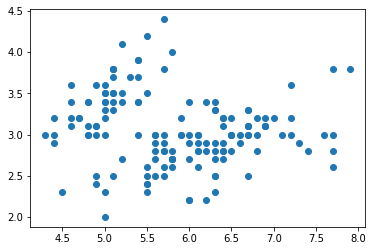

In [4]:
plt.scatter(x = X[:,0],y = X[:,1])

In [18]:
def k_means(k,reps = 20):

    best_inertia = 10**10
    for i in range(reps):
        clustering = np.random.choice([i for i in range(k)],len(X),replace =True)
        prev_clustering = np.zeros(len(X))
        while not (clustering==prev_clustering).all():
            X_dist_cluster = np.zeros((len(X),k))
            for i in range(k):
                if len((X[clustering == i]))>0:
                    centroid = np.mean(X[clustering == i],axis = 0)
                    X_dist_cluster[:,i] = np.sqrt(np.sum((X - centroid)**2,axis = 1))
                else:
                    X_dist_cluster[:,i] = np.ones(len(X))*10**7
            prev_clustering = clustering
            clustering = np.argmin(X_dist_cluster,axis = 1)
            clustering = pd.Categorical(clustering,categories = [i for i in range(k)])
        inertia = np.sum(X_dist_cluster[pd.get_dummies(clustering,dtype = bool)]**2)
            
        if inertia < best_inertia:
            best_inertia = inertia
            best_clustering = clustering
            
    return best_clustering,inertia

In [41]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5)
kmeans.fit(X)
kmeans.inertia_

21.002125982249428

In [32]:
clustering,inertia = k_means(100)

In [42]:
inertias = []
for k in range(2,100):
    clustering,inertia = k_means(k)
    inertias.append({"inertia":inertia,"k":k,"prov":"me"})

In [43]:
for k in range(2,100):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    inertias.append({"inertia": kmeans.inertia_,"k":k,"prov":"sklearn"})

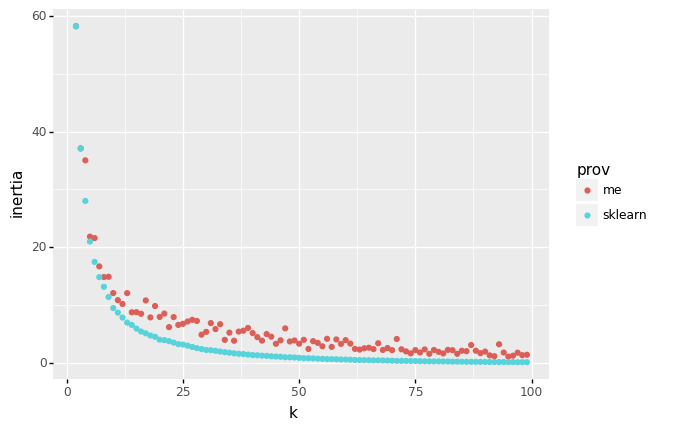

<ggplot: (8757875830318)>

In [44]:
inertias = pd.DataFrame(inertias)
ggplot(inertias) + geom_point(aes(x = "k",y = "inertia",color = "prov"))

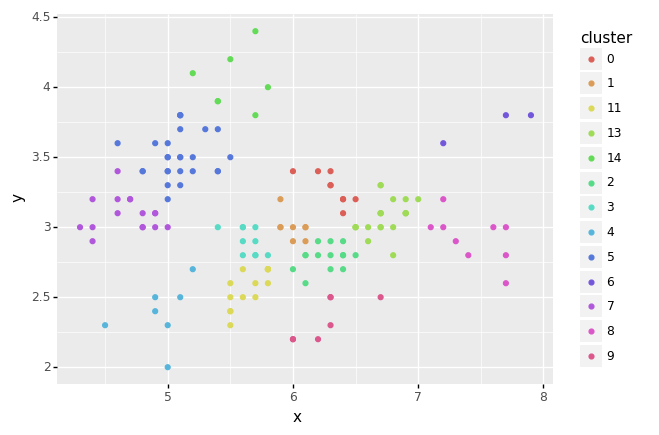

<ggplot: (8730310243660)>

In [382]:
df =pd.DataFrame(X)
df = df.rename(columns = {0:"x",1:"y"})
df["cluster"] = clustering.astype(str)
ggplot(df) + geom_point(aes(x = "x",y = "y",color = "cluster"))

In [38]:
np.mean(X[clustering==0],axis = 0)

array([6.07333333, 3.07333333])